In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [129]:
workouts_df = pd.read_csv("../data/workouts.csv")
daily_df_all = pd.read_csv("../data/daily_data.csv")

# Get the part of the data where we have valid WHOOP scores
daily_df = daily_df_all[daily_df_all["Whoop Recovery Score"].notnull()]
daily_df = daily_df[daily_df["Fatigue"].notnull()]
daily_df = daily_df[daily_df["Motivation"].notnull()]
daily_df = daily_df[daily_df["Stress"].notnull()]

max(daily_df["Fatigue"])




6.0

In [158]:
# Prepare the features
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Predictors
motivation = daily_df["Motivation"]
fatigue = daily_df["Fatigue"]
stress = daily_df["Stress"]

data = np.array([motivation, fatigue, stress]).reshape(-1,3)
scaler = StandardScaler()
scaler.fit(data)
X = scaler.transform(data)

# Targets
whoop = np.array(daily_df["Whoop Recovery Score"] / 100).reshape(-1,1)

scaler_2 = StandardScaler()
scaler_2.fit(whoop)
y = scaler_2.transform(whoop).ravel()


(0.0, 1.0)

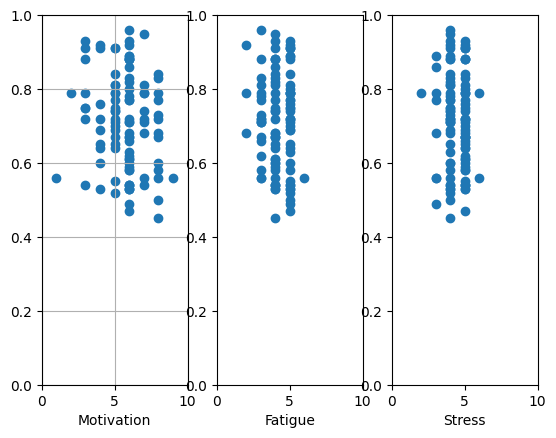

In [169]:
f, axs = plt.subplots(1,3)
axs[0].scatter(motivation, whoop)
axs[0].set_xlabel("Motivation")
axs[0].set_xlim([0, 10])
axs[0].set_ylim([0, 1])
axs[0].grid(True)


axs[1].scatter(fatigue, whoop)
axs[1].set_xlabel("Fatigue")
axs[1].set_xlim([0, 10])
axs[1].set_ylim([0, 1])
axs[1].grid(True)




axs[2].scatter(stress, whoop)
axs[2].set_xlabel("Stress")
axs[2].set_xlim([0, 10])
axs[2].set_ylim([0, 1])
axs[2].grid(True)






In [150]:
# Train / Test Split 75/25
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [157]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1,max_iter=10000).fit(X_train, y_train)
regr.score(X_test,y_test)

# plt.scatter(y_test, y_pred)

# plt.scatter(X_train[:,1], y_train)

-0.6967277833328662

In [108]:
# Add the percentage of each sleep to the dataframe
daily_df["pct_sleep_deep"] = 100 * daily_df["Time In Deep Sleep"] / daily_df["Sleep Hours"]
daily_df["pct_sleep_light"] = 100 * daily_df["Time In Light Sleep"] / daily_df["Sleep Hours"]
daily_df["pct_sleep_rem"] = 100 * daily_df["Time In REM Sleep"] / daily_df["Sleep Hours"]
daily_df["pct_sleep_awake"] = 100 * daily_df["Time Awake"] / daily_df["Sleep Hours"]


In [53]:
deep = daily_df["pct_sleep_deep"]
daily_df["next_night_pct_sleep_deep"] = daily_df["pct_sleep_deep"].shift(periods=-1)
daily_df["next_night_pct_sleep_light"] = daily_df["pct_sleep_light"].shift(periods=-1)
daily_df["next_night_pct_sleep_awake"] = daily_df["pct_sleep_awake"].shift(periods=-1)
daily_df["next_night_pct_sleep_rem"] = daily_df["pct_sleep_rem"].shift(periods=-1)


In [68]:

from sklearn.preprocessing import StandardScaler

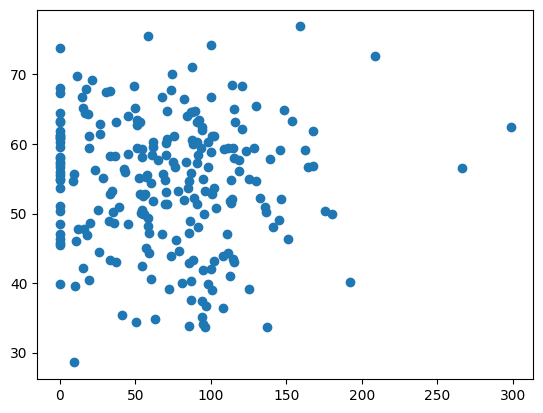

In [67]:
plt.scatter(daily_df["TSS"], daily_df["next_night_pct_sleep_light"])
# Idea: 
# Train one model using Fatigue & Motivation
# Difference between subjective & objective data for recovery prediction

# How well can we predict whoop score using Fatigue & Motivation ratings? 


Text(0.5, 1.0, 'TSS vs Motivation')

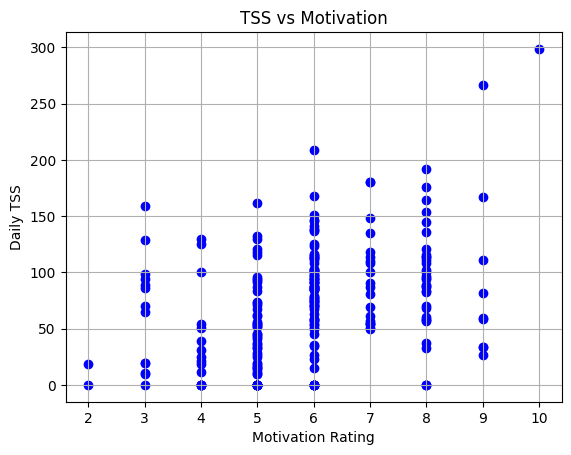

In [34]:
# TSS vs Sleep
plt.scatter(daily_df["Motivation"], daily_df["TSS"], c="b")
plt.grid(True)
plt.xlabel("Motivation Rating")
plt.ylabel("Daily TSS")
plt.title("TSS vs Motivation")